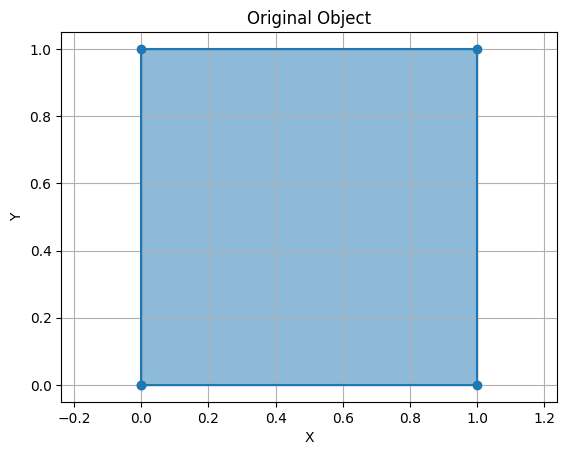

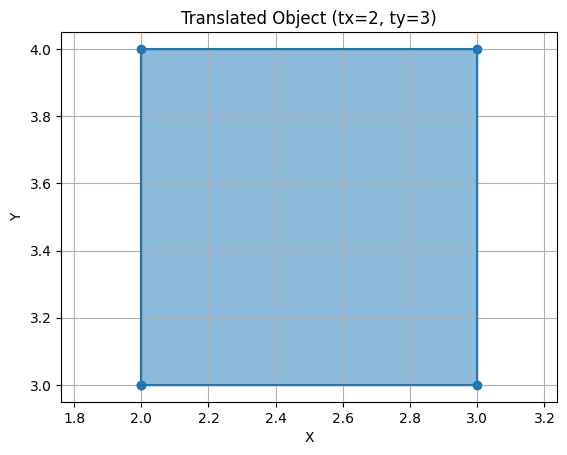

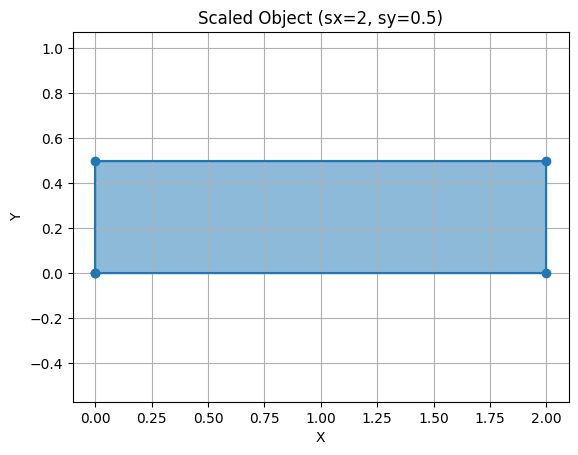

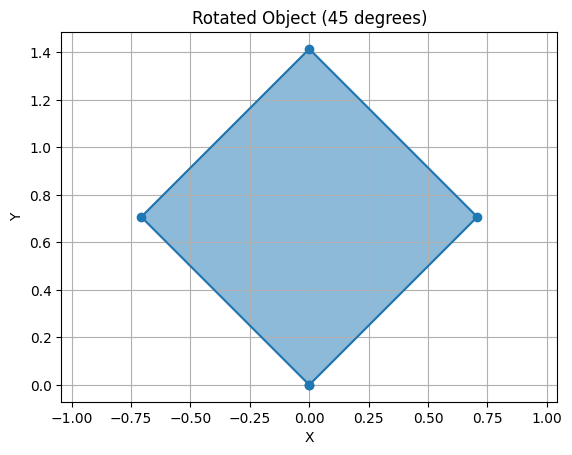

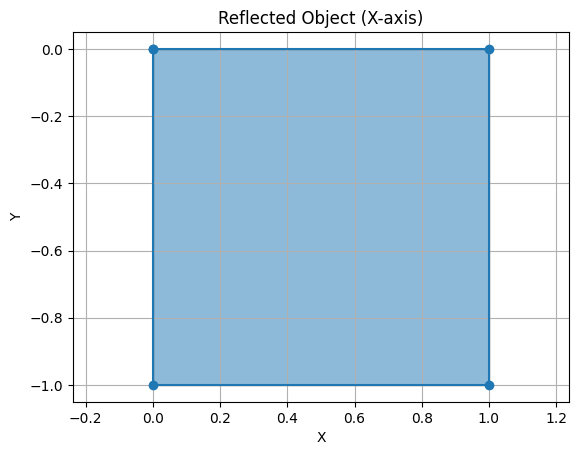

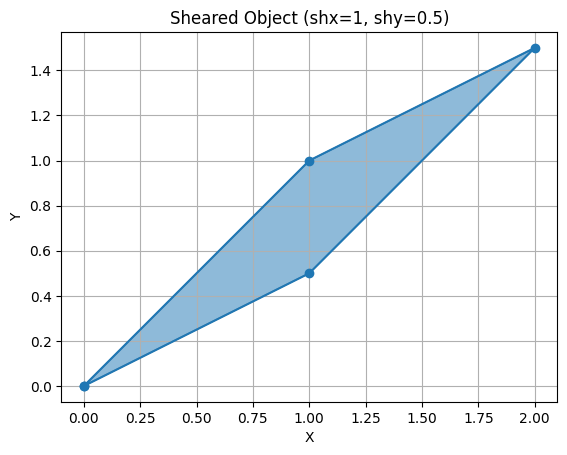

In [ ]:
# TASK 1
import numpy as np
import matplotlib.pyplot as plt

def plot_object(vertices, title):
    """Plots a 2D object given its vertices."""
    plt.figure()
    plt.fill(*zip(*vertices), alpha=0.5, edgecolor='black')
    plt.plot(*zip(*vertices, vertices[0]), marker='o')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

def translate(vertices, tx, ty):
    """Applies translation to a 2D object."""
    transformation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    vertices_h = np.hstack((vertices, np.ones((len(vertices), 1))))
    transformed = vertices_h @ transformation_matrix.T
    return transformed[:, :2]

def scale(vertices, sx, sy):
    """Applies scaling to a 2D object."""
    transformation_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0,  0, 1]
    ])
    vertices_h = np.hstack((vertices, np.ones((len(vertices), 1))))
    transformed = vertices_h @ transformation_matrix.T
    return transformed[:, :2]

def rotate(vertices, angle):
    """Applies rotation to a 2D object."""
    rad = np.radians(angle)
    transformation_matrix = np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad),  np.cos(rad), 0],
        [0, 0, 1]
    ])
    vertices_h = np.hstack((vertices, np.ones((len(vertices), 1))))
    transformed = vertices_h @ transformation_matrix.T
    return transformed[:, :2]

def reflect(vertices, axis):
    """Applies reflection to a 2D object."""
    if axis == 'x':
        transformation_matrix = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0,  0, 1]
        ])
    elif axis == 'y':
        transformation_matrix = np.array([
            [-1, 0, 0],
            [ 0, 1, 0],
            [ 0, 0, 1]
        ])
    else:
        raise ValueError("Invalid axis. Choose 'x' or 'y'.")

    vertices_h = np.hstack((vertices, np.ones((len(vertices), 1))))
    transformed = vertices_h @ transformation_matrix.T
    return transformed[:, :2]

def shear(vertices, shx, shy):
    """Applies shearing to a 2D object."""
    transformation_matrix = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0,  0, 1]
    ])
    vertices_h = np.hstack((vertices, np.ones((len(vertices), 1))))
    transformed = vertices_h @ transformation_matrix.T
    return transformed[:, :2]

# Example Object (A square)
vertices = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1]
])

# Plot original object
plot_object(vertices, "Original Object")

# Apply transformations
translated = translate(vertices, 2, 3)
plot_object(translated, "Translated Object (tx=2, ty=3)")

scaled = scale(vertices, 2, 0.5)
plot_object(scaled, "Scaled Object (sx=2, sy=0.5)")

rotated = rotate(vertices, 45)
plot_object(rotated, "Rotated Object (45 degrees)")

reflected = reflect(vertices, 'x')
plot_object(reflected, "Reflected Object (X-axis)")

sheared = shear(vertices, 1, 0.5)
plot_object(sheared, "Sheared Object (shx=1, shy=0.5)")


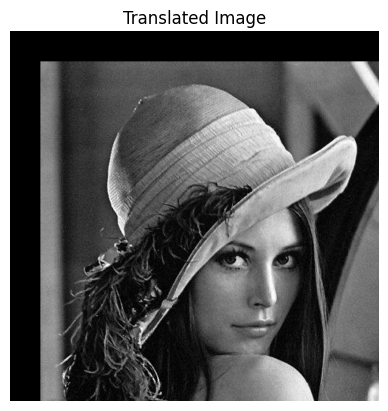

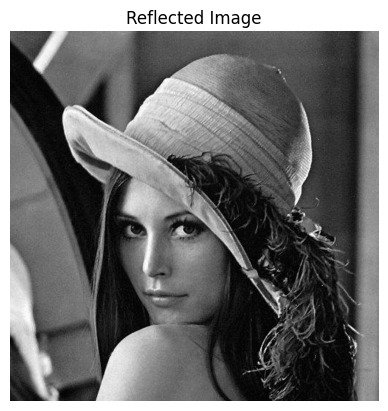

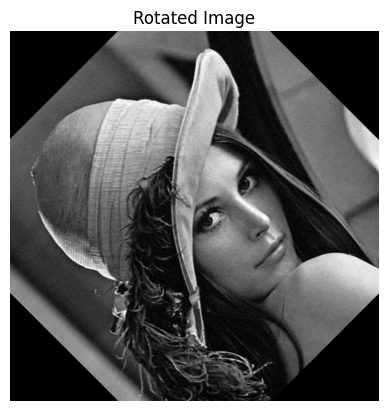

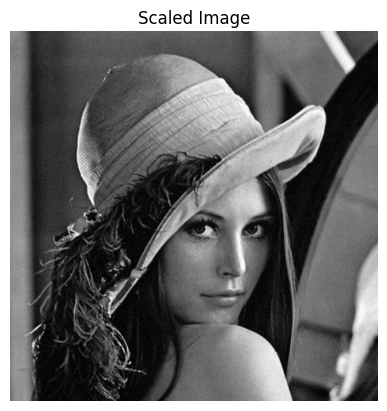

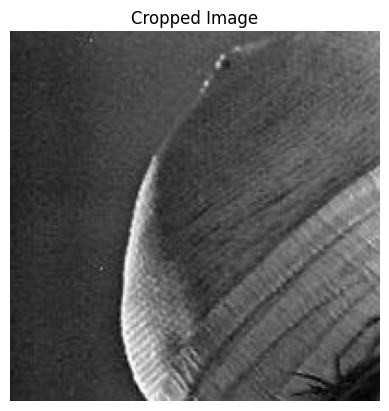

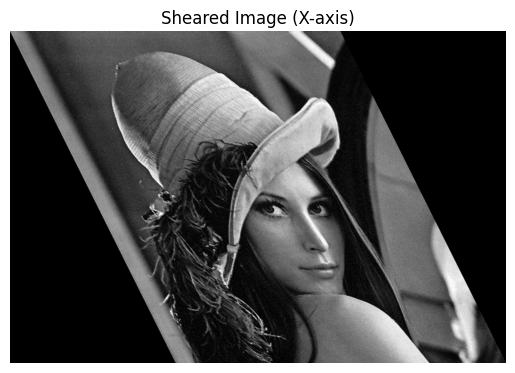

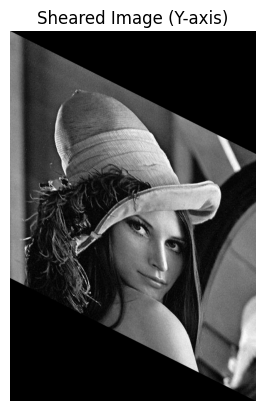

In [ ]:
# TASK- 2
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/image.png'
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError("The image file was not found.")

# Convert to RGB for visualization in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to display images
def display_image(title, img):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Image Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(img, M, (cols, rows))
    return translated

translated_image = translate_image(image_rgb, 50, 50)
display_image("Translated Image", translated_image)

# 2. Image Reflection
def reflect_image(img):
    reflected = cv2.flip(img, 1)  # Flip around the y-axis
    return reflected

reflected_image = reflect_image(image_rgb)
display_image("Reflected Image", reflected_image)

# 3. Image Rotation
def rotate_image(img, angle):
    rows, cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated = cv2.warpAffine(img, M, (cols, rows))
    return rotated

rotated_image = rotate_image(image_rgb, 45)
display_image("Rotated Image", rotated_image)

# 4. Image Scaling
def scale_image(img, scale_x, scale_y):
    scaled = cv2.resize(img, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)
    return scaled

scaled_image = scale_image(image_rgb, 1.5, 1.5)
display_image("Scaled Image", scaled_image)

# 5. Image Cropping
def crop_image(img, start_x, start_y, width, height):
    cropped = img[start_y:start_y + height, start_x:start_x + width]
    return cropped

cropped_image = crop_image(image_rgb, 50, 50, 200, 200)
display_image("Cropped Image", cropped_image)

# 6. Shearing in x-axis
def shear_image_x(img, shear_factor):
    rows, cols = img.shape[:2]
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_x = cv2.warpAffine(img, M, (cols + int(rows * shear_factor), rows))
    return sheared_x

sheared_x_image = shear_image_x(image_rgb, 0.5)
display_image("Sheared Image (X-axis)", sheared_x_image)

# 7. Shearing in y-axis
def shear_image_y(img, shear_factor):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_y = cv2.warpAffine(img, M, (cols, rows + int(cols * shear_factor)))
    return sheared_y

sheared_y_image = shear_image_y(image_rgb, 0.5)
display_image("Sheared Image (Y-axis)", sheared_y_image)
